In [1]:
import numpy as np; import pandas as pd
import xarray as xr; import matplotlib.pyplot as plt;
from assemble_class import assemble
import sqlite3

In [2]:
conn = sqlite3.connect('LoaderDB.db') # connection
conn.row_factory = sqlite3.Row
c = conn.cursor()
c.execute('SELECT * from loaderDB')
My_DICTs = [dict(row) for row in c.fetchall()]

In [3]:
My_DICTs[0]

{'name': 'SIO1',
 'type': 'MOORING',
 'project': 'PISTON',
 't0': '2019-02-01',
 't1': '2019-02-07',
 'lon': 134.7,
 'lat': 12.3}

In [4]:
obj_1 = My_DICTs[0].copy()
obj_1

{'name': 'SIO1',
 'type': 'MOORING',
 'project': 'PISTON',
 't0': '2019-02-01',
 't1': '2019-02-07',
 'lon': 134.7,
 'lat': 12.3}

In [5]:
limits_keys = ['t0','t1','lon','lat']
obj_1['limits'] = {key: obj_1[key] for key in obj_1 if key in limits_keys}
for key in limits_keys: del obj_1[key]

In [7]:
My_DICTs[0]

{'name': 'SIO1',
 'type': 'MOORING',
 'project': 'PISTON',
 't0': '2019-02-01',
 't1': '2019-02-07',
 'lon': 134.7,
 'lat': 12.3,
 'limits': {'t0': '2019-02-01', 't1': '2019-02-07', 'lon': 134.7, 'lat': 12.3}}

In [8]:
def format_change(DICT):
    limits_keys = ['t0','t1','lon','lat']
    for n in range(len(DICT)):
        DICT[n]['limits'] = {key: DICT[n][key] for key in My_DICTs[n] if key in limits_keys}
        for key in limits_keys: del DICT[n][key]

In [9]:
format_change(My_DICTs)

In [13]:
My_DICTs[2]

{'name': 'SIO1',
 'type': 'MOORING',
 'project': 'PISTON',
 'limits': {'t0': '2019-02-14', 't1': '2019-02-20', 'lon': 134.7, 'lat': 12.3}}

In [14]:
adcpfolder = '/Documentos/CUCEI LIFI/Practicas Profesionales/modview/Archivos_Prueba/SIO1/'
filenames_1 = ['SIO1_3160.nc','SIO1_4021.nc','SIO1_11181.nc'];
files_1 = [adcpfolder + filenames_1[kk] for kk in range(len(filenames_1))]

### Para probar con  SIO3  ####

# filenames_2 = []
# files_2 = [adcpfolder + filenames_2[kk] for kk in range(len(filenames_1))]

In [20]:
SIO1 = assemble(My_DICTs[1], files_1)
vars2plot = ['u'];

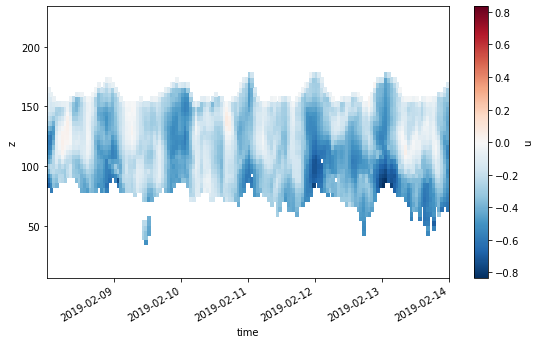

In [21]:
SIO1.storevar(files_1,'u',My_DICTs[1]['limits'])
SIO1.grids['u'][0].plot(figsize=[9,5])

In [40]:
def Prepare_id(**kwargs):
    Data = "SELECT * FROM loaderDB"
    i = 0
    for key, value in kwargs.items():
        if i == 0:
            Data += " WHERE "
        else:
            Data += " AND "
        Data += "{}='{}'".format(key, value)
        i += 1
    Data += ";"
    return c.execute(Data)

In [49]:
Prepare_id(t0 = '2019-02-21')

In [50]:
calis = [dict(row) for row in c.fetchall()]

In [51]:
calis

[{'name': 'SIO1',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-21',
  't1': '2019-02-27',
  'lon': 134.7,
  'lat': 12.3},
 {'name': 'SIO3',
  'type': 'MOORING',
  'project': 'PISTON',
  't0': '2019-02-21',
  't1': '2019-02-27',
  'lon': 134.7,
  'lat': 12.3}]